In [2]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [23]:
###
from keras.datasets import fashion_mnist

In [24]:
fashion_dict = {0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankel boot",
}

In [25]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Dress


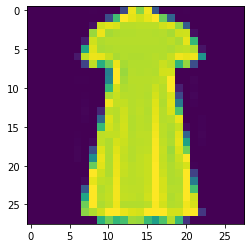

In [27]:
plt.imshow(X_train[0])
print(fashion_dict[y_train[0]])

In [28]:
X_train.shape

(45000, 28, 28)

In [29]:
from keras.layers import Flatten

### X_train --> Flatten --> Dense --> Dense --> Dense --> Dense(output)

In [30]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [32]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="sigmoid"),
        Dense(1024,activation="sigmoid"),
        Dense(512,activation="sigmoid"),
        Dense(output_shape,activation="softmax")
    ]
)

In [36]:
for i in range(1,len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
np.sum(model1.layers[1].get_weights()[0]) == np.sum(model2.layers[1].get_weights()[0])

True

In [38]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [40]:
print("relu", model1.evaluate(X_test,y_test))
print("sigmoid", model2.evaluate(X_test,y_test))

313/313 [==============================] - 2s 8ms/step - loss: 0.3894 - accuracy: 0.8776
relu [0.389365017414093, 0.8776000142097473]
313/313 [==============================] - 2s 7ms/step - loss: 0.5281 - accuracy: 0.8007
sigmoid [0.5280756950378418, 0.8007000088691711]


In [44]:
### 분포 값 변경 (relu)

In [47]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [51]:
model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

In [53]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [54]:
print("relu1", model1.evaluate(X_test,y_test))
print("relu2", model2.evaluate(X_test,y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.8549
relu1 [0.4655281603336334, 0.8549000024795532]
313/313 [==============================] - 3s 7ms/step - loss: 0.3615 - accuracy: 0.8766
relu2 [0.3614659011363983, 0.8766000270843506]


In [56]:
### optimizer = "rmsprop"

In [57]:
model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(128,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

In [64]:
optimizer = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [65]:
print("rmsprop short", model1.evaluate(X_test,y_test))
print("rmsprop long", model2.evaluate(X_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.8490
rmsprop short [0.4523293077945709, 0.8489999771118164]
313/313 [==============================] - 1s 4ms/step - loss: 0.4532 - accuracy: 0.8558
rmsprop long [0.4532102048397064, 0.8557999730110168]


In [ ]:
###

In [72]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(1024,activation="relu"))
model1.add(Dense(512,activation="relu"))
model1.add(Dense(256,activation="relu"))
model1.add(Dense(output_shape,activation="softmax"))

model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(1024,activation="relu"))
model2.add(Dense(512,activation="relu"))
model2.add(Dense(256,activation="relu"))
model2.add(Dense(output_shape,activation="softmax"))

In [73]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

In [77]:
from datetime import datetime

In [76]:
model1.fit(X_train,
        y_train,
        epochs=20,
        batch_size=len(X_train),
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=20,
        batch_size=400,
        verbose=0
        )

print("adam1", model1.evaluate(X_test,y_test))
print("adam2", model2.evaluate(X_test,y_test))

313/313 [==============================] - 2s 4ms/step - loss: 6.5948 - accuracy: 0.6668
adam1 [6.594831943511963, 0.6668000221252441]
313/313 [==============================] - 2s 5ms/step - loss: 0.4306 - accuracy: 0.8689
adam2 [0.4305586516857147, 0.8689000010490417]
CPU times: total: 10min 38s
Wall time: 1min 50s


In [81]:
model1_s = datetime.now()
model1.fit(X_train,
        y_train,
        epochs=30,
        batch_size=len(X_train),
        verbose=0
        )
model1_e = datetime.now()
model1_t = model1_e - model1_s

model2_s = datetime.now()
model2.fit(X_train,
        y_train,
        epochs=30,
        batch_size=400,
        verbose=0
        )
model2_e = datetime.now()
model2_t = model2_e - model2_s


print("adam1", model1.evaluate(X_test,y_test))
print("adam2", model2.evaluate(X_test,y_test))
print("\n")
print(model1_t, "\n")
print(model2_t)

313/313 [==============================] - 1s 5ms/step - loss: 0.7744 - accuracy: 0.8196
adam1 [0.7743507623672485, 0.819599986076355]
313/313 [==============================] - 1s 4ms/step - loss: 0.6334 - accuracy: 0.8821
adam2 [0.6333572864532471, 0.882099986076355]


0:00:53.044490 

0:01:37.790548


In [86]:
model = Sequential(
    [Flatten(input_shape=input_shape),
    Dense(1024,activation="relu"),
    Dense(512,activation="relu"),
    Dense(256,activation="relu"),
    Dense(output_shape,activation="softmax")]
)

batch_size = [len(X_train), int(len(X_train)/2), int(len(X_train)/4),
            int(len(X_train)/8), int(len(X_train)/16)]

elapse_time = []
accuracy = []
l1 = [model.layers[1].get_weights()[0], model.layers[1].get_weights()[1]] 
l2 = [model.layers[2].get_weights()[0], model.layers[2].get_weights()[1]] 
l3 = [model.layers[3].get_weights()[0], model.layers[3].get_weights()[1]] 
l4 = [model.layers[4].get_weights()[0], model.layers[4].get_weights()[1]] 

for i in range(len(batch_size)):
    model.layers[1].set_weights(l1)
    model.layers[2].set_weights(l2)
    model.layers[3].set_weights(l3)
    model.layers[4].set_weights(l4)
    
    optimizer = "adam"
    loss = "categorical_crossentropy"
    metrics = ["accuracy"]

    model.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
    
    st_time = datetime.now()
    model.fit(X_train, 
            y_train,
            epochs=20,
            batch_size = batch_size[i],
            verbose=0)
    ed_time = datetime.now()
    elapse_time.append(ed_time - st_time)
    
    acc = np.sum(np.argmax(model.predict(X_test),axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
    accuracy.append(acc)
    
result = {"batch_size":batch_size, "time":elapse_time, "accuracy":accuracy}

result

313/313 [==============================] - 2s 5ms/step


{'batch_size': [45000, 22500, 11250, 5625, 2812],
 'time': [datetime.timedelta(seconds=33, microseconds=909947),
  datetime.timedelta(seconds=41, microseconds=268141),
  datetime.timedelta(seconds=44, microseconds=543682),
  datetime.timedelta(seconds=47, microseconds=124798),
  datetime.timedelta(seconds=47, microseconds=239441)],
 'accuracy': [0.6536, 0.7615, 0.7941, 0.829, 0.7438]}

In [87]:
pd.DataFrame(result)

,batch_size,time,accuracy
0,45000,0 days 00:00:33.909947,0.6536
1,22500,0 days 00:00:41.268141,0.7615
2,11250,0 days 00:00:44.543682,0.7941
3,5625,0 days 00:00:47.124798,0.8290
4,2812,0 days 00:00:47.239441,0.7438


In [1]:
# model.layers[1].set_weights(l1)
# model.layers[2].set_weights(l2)
# model.layers[3].set_weights(l3)
# model.layers[4].set_weights(l4)

# optimizer = "adam"
# loss = "categorical_crossentropy"
# metrics = ["accuracy"]

# model.compile(optimizer=optimizer,
#         loss =loss,
#         metrics=metrics)

# st_time = datetime.now()
# model.fit(X_train, 
#         y_train,
#         epochs=20,
#         batch_size = 1,
#         verbose=0)
# ed_time = datetime.now()
# elapse = ed_time - st_time

In [2]:
# elapse

In [ ]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(128,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

In [ ]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

In [ ]:
model.fit(X_train,
        y_train,
        epochs=30,
        validation_data=(X_val,y_val),
        batch_size=1000
        )

In [ ]:
### history.history(overfitting 판단시 사용) - dict 형태

In [ ]:
plt.plot(np.arange(1,31),model.history.history["loss"])
plt.plot(np.arange(1,31),model.history.history["val_loss"])
plt.show()

In [ ]:
plt.plot(np.arange(1,31),model.history.history["accuracy"])
plt.plot(np.arange(1,31),model.history.history["val_accuracy"])
plt.show()